In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (20,10)})


In [2]:
test_data = pd.read_csv('https://github.com/deevil/data_since/raw/master/test_data.csv')

test_data['count'] = 1
test_data.head(10)


,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date,count
0,1.554744e+09,report,CPM,0,no_agency,client_21074,campaign_27489,ad_27489,android,2019-04-08,1
1,1.555103e+09,click,CPM,0,no_agency,client_22392,campaign_35893,ad_35893,android,2019-04-12,1
2,1.555403e+09,click,CPM,0,no_agency,client_16836,campaign_26799,ad_26804,web,2019-04-16,1
3,1.554822e+09,click,CPM,0,no_agency,client_22920,campaign_37146,ad_37146,android,2019-04-09,1
4,1.554967e+09,click,CPM,0,no_agency,client_645,campaign_15893,ad_15944,web,2019-04-11,1
5,1.555419e+09,view,CPC,0,no_agency,client_265,campaign_13516,ad_13517,android,2019-04-16,1
6,1.555146e+09,report,CPM,0,no_agency,client_22021,campaign_34637,ad_34651,mvk,2019-04-13,1
7,1.554503e+09,view,CPM,0,agency_155,client_105617,campaign_106015,ad_106015,iphone,2019-04-05,1
8,1.554941e+09,view,CPM,0,no_agency,client_264,campaign_13491,ad_13513,android,2019-04-10,1
9,1.554719e+09,view,CPM,0,no_agency,client_1728,campaign_19254,ad_19255,android,2019-04-08,1


**Структура данных **

time — время взаимодействия пользователя с рекламой в формате UnixTime;

event — тип взаимодействия (click — клик на объявление, view — показ объявления, report — жалоба на объявление);

ad_cost_type — тип трат рекламного объявления (CPM — траты за 1000 показов, CPC — траты за клик);

has_video — наличие видео в объявлении (0 — нет, 1 — есть);

agency_union_id — id рекламного агентства (если рекламный кабинет принадлежит физическому лицу, то ячейка будет заполнена значением 'no_agency');

client_union_id — id рекламного клиента;

campaign_union_id — id рекламной кампании;

ad_id — id рекламного объявления;

platform — платформа, с которой пользователь взаимодействовал с рекламой (web — веб-версия, mvk — мобильная версия, iphone — IOS-приложение, android — Android-приложение, wphone — Windows Phone-приложение).




Немного дополнительной информации о структуре рекламы ВКонтакте. Есть две основные группы рекламодателей: агентства и клиенты. Агентствами являются рекламные кабинеты юридических лиц. Среди клиентов же существуют как клиенты этих самых агентств, так и автономные рекламные кабинеты физических лиц, над которыми нет агентств. Рекламные кампании — это наборы рекламных объявлений. Они есть в каждом кабинете. 


Аналитики очень любят смотреть на графики. Однажды аналитик ВКонтакте пришёл на работу, открыл графики количества рекламных событий по дням (смотри приложение) и сразу же заметил сильный скачок данных за 11 апреля. 





# **1. Воспроизведите график числа рекламных событий по дням. **


Для начала рисуем график всех событий чтобы увидеть скриншот из задания


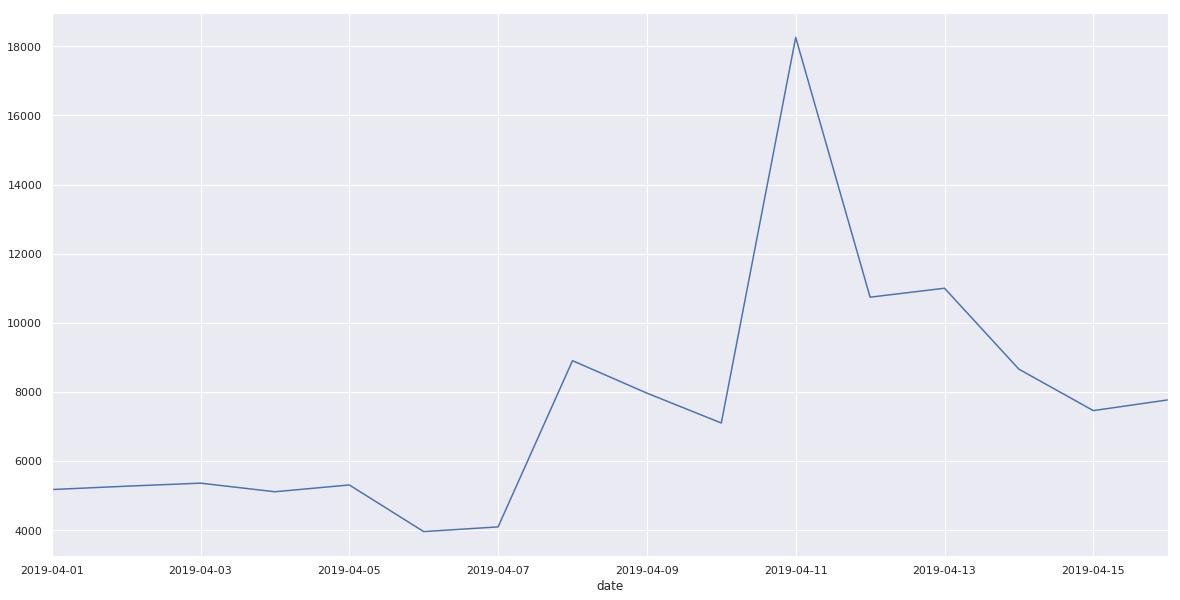

In [3]:
pivoted = pd.pivot_table(test_data, values='count', index='date', aggfunc='sum')
pivoted.plot(legend=False)

# 2. Найдите причину резкого увеличения количества рекламных событий и объясните, что произошло. 


**Для начала визуализируем данные группируя их по различным параметрам**


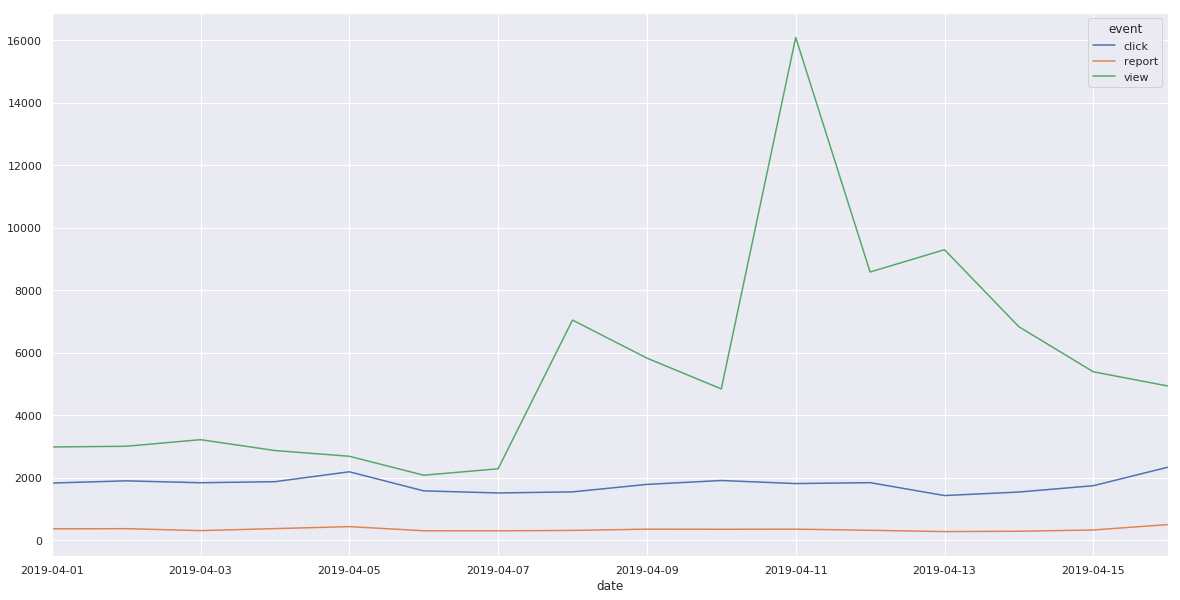

In [4]:
pivoted = pd.pivot_table(test_data, values='count', columns='event', index='date', aggfunc='sum')
pivoted.plot()

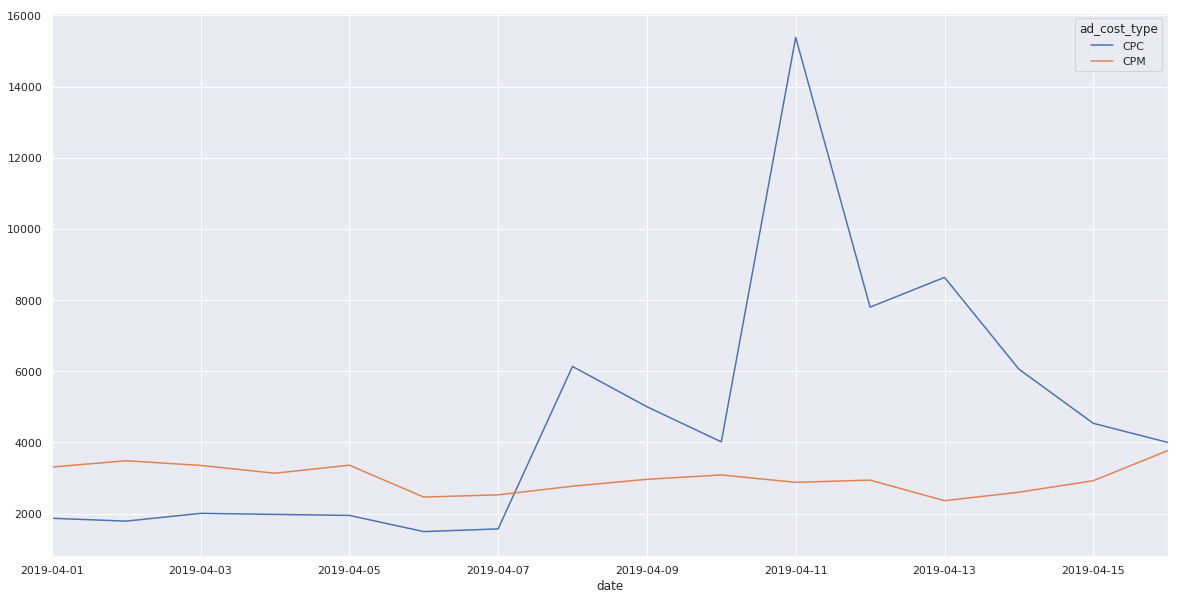

In [5]:
pivoted = pd.pivot_table(test_data, values='count', columns='ad_cost_type', index='date', aggfunc='sum')
pivoted.plot()

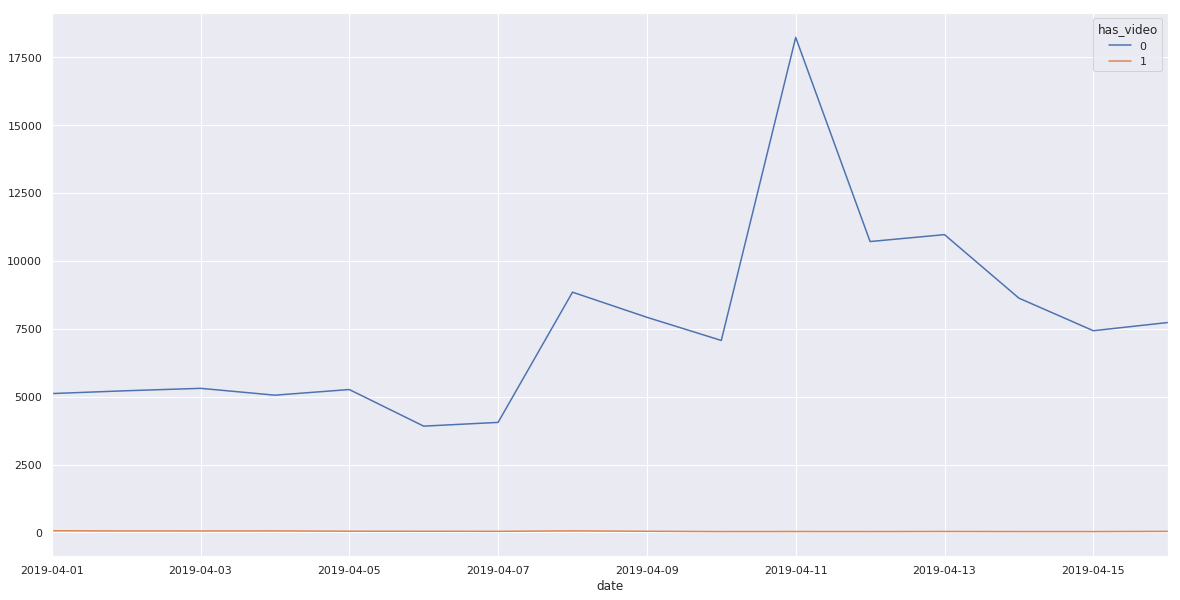

In [6]:
pivoted = pd.pivot_table(test_data, values='count', columns='has_video', index='date', aggfunc='sum')
pivoted.plot()

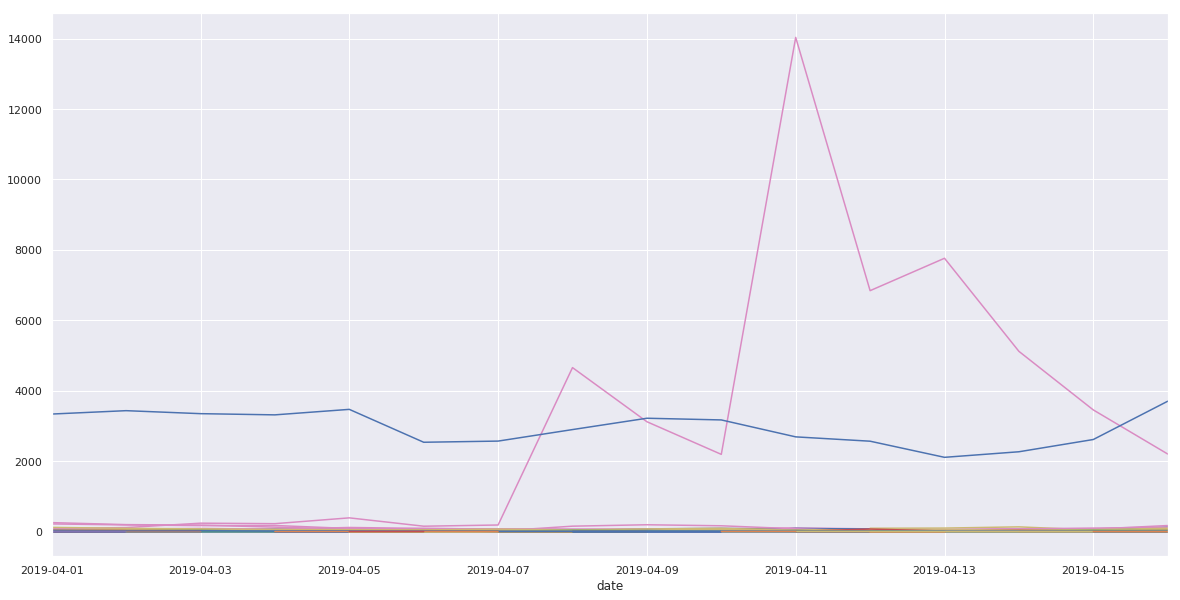

In [7]:
pivoted = pd.pivot_table(test_data, values='count', columns='agency_union_id', index='date', aggfunc='sum')
pivoted.plot(legend=False)

In [0]:
# слишком долго рисует - видимо много разных клиентов

#pivoted = pd.pivot_table(test_data, values='count', columns='client_union_id', index='date', aggfunc='sum')
#pivoted.plot(legend=False)

In [0]:
# слишком долго рисует - видимо много разных компаний

#pivoted = pd.pivot_table(test_data, values='count', columns='campaign_union_id', index='date', aggfunc='sum')
#pivoted.plot(legend=False)

In [0]:
# слишком долго рисует - видимо много разных объявлений

#pivoted = pd.pivot_table(test_data, values='count', columns='ad_id', index='date', aggfunc='sum')
#pivoted.plot(legend=False)

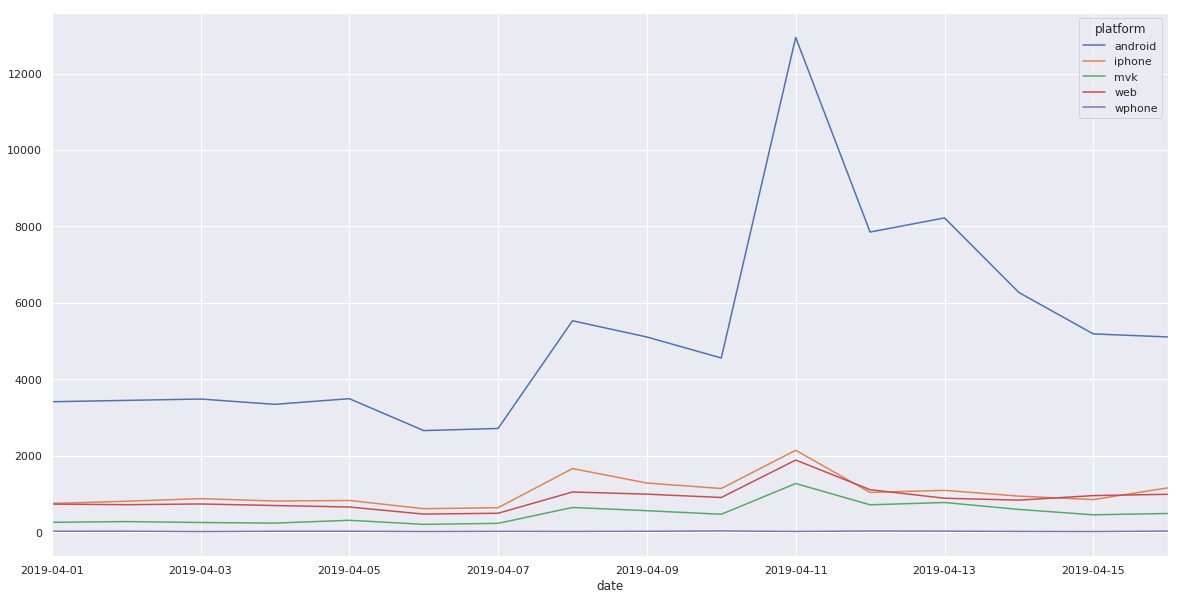

In [11]:
pivoted = pd.pivot_table(test_data, values='count', columns='platform', index='date', aggfunc='sum')
pivoted.plot()

Промежуточные итоги следующие:


event	 - есть резкий скачок для event равного View. Для остальных график относительно ровный.

ad_cost_type	- интересен CPC

has_video	 - без видео

agency_union_id	- так как много разных данных, то надо иследовать детальней. Но на графике видно как одно агенство выбивается из общего ритма.

client_union_id	- различных вариантов слишком много, поэтому сложно визуализировать

campaign_union_id	- различных вариантов слишком много, поэтому сложно визуализировать

ad_id	- различных вариантов слишком много, поэтому сложно визуализировать

platform - в целом нет выделяющейся на данном срезе


In [12]:
# Ищем выделяющееся рекламное агентство и проверяем что это не 'no_agency'

#группируем и сортируем данные по датам и агенствам

test_data.groupby(['agency_union_id', 'date']).time.count().reset_index().sort_values(by='time', ascending=False).head(10)

,agency_union_id,date,time
621,agency_2,2019-04-11,14035
623,agency_2,2019-04-13,7763
622,agency_2,2019-04-12,6843
624,agency_2,2019-04-14,5120
618,agency_2,2019-04-08,4658
2325,no_agency,2019-04-16,3703
2314,no_agency,2019-04-05,3472
625,agency_2,2019-04-15,3456
2311,no_agency,2019-04-02,3435
2312,no_agency,2019-04-03,3350


Получили что больше всехо событий у agency_2

Посмотрим на график без него и отдельно по agency_2, чтобы убедиться в этом

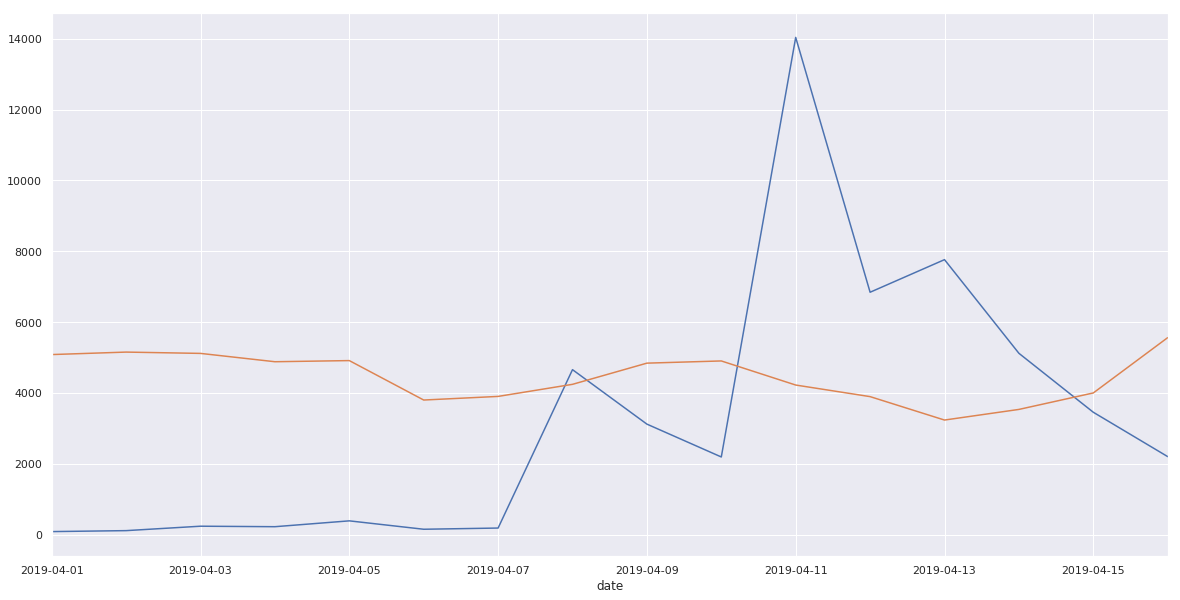

In [13]:
test_data[test_data.agency_union_id == 'agency_2'].groupby('date').time.count().plot()
test_data[test_data.agency_union_id != 'agency_2'].groupby('date').time.count().plot()

Исходя из графика это точно agency_2

Отбираем данные этого агенства и анализируем детальней


In [14]:
ag2_data = test_data[test_data.agency_union_id == 'agency_2']
ag2_data.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date,count
10,1.554738e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49564,web,2019-04-08,1
11,1.555170e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-13,1
14,1.555252e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-14,1
16,1.555013e+09,view,CPC,0,agency_2,client_47269,campaign_47269,ad_47269,android,2019-04-11,1
19,1.555011e+09,view,CPC,0,agency_2,client_47270,campaign_49554,ad_49554,android,2019-04-11,1


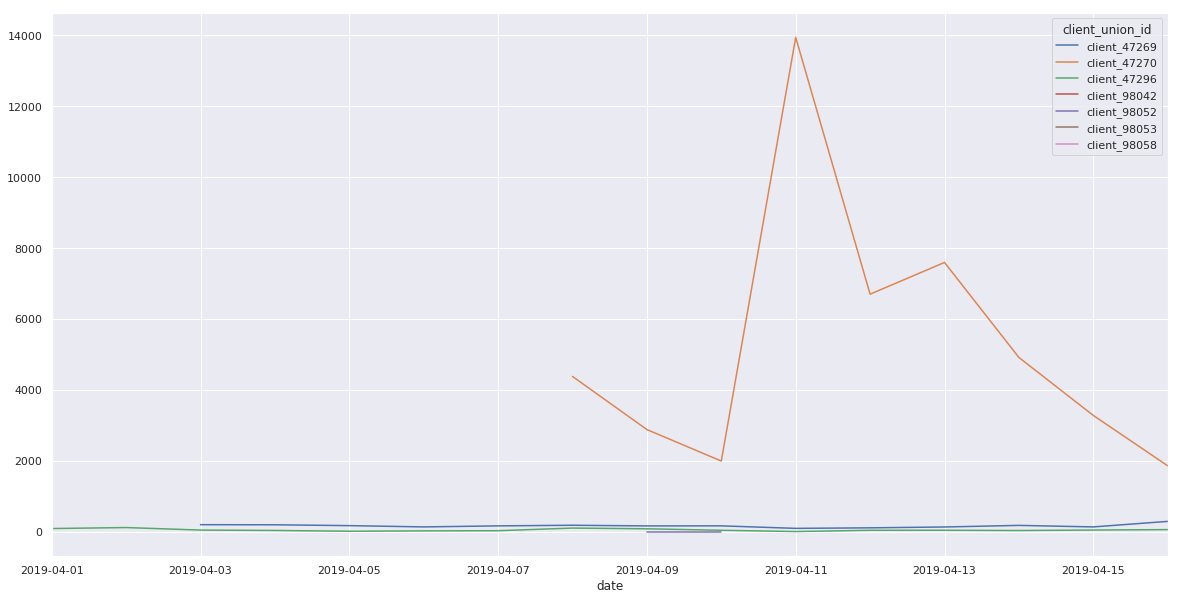

In [15]:
pivoted = pd.pivot_table(ag2_data, values='count', columns='client_union_id', index='date', aggfunc='sum')
pivoted.plot()

Видим что выделяется client_47270

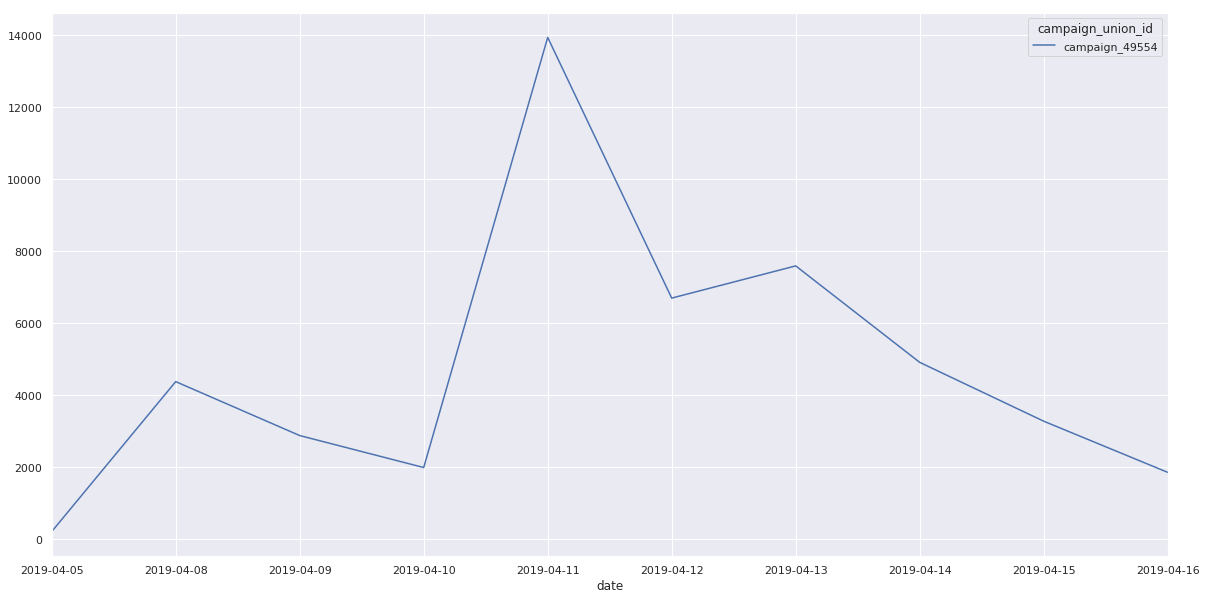

In [16]:
pivoted = pd.pivot_table(ag2_data[ag2_data.client_union_id == 'client_47270'], values='count', columns='campaign_union_id', index='date', aggfunc='sum')
pivoted.plot()

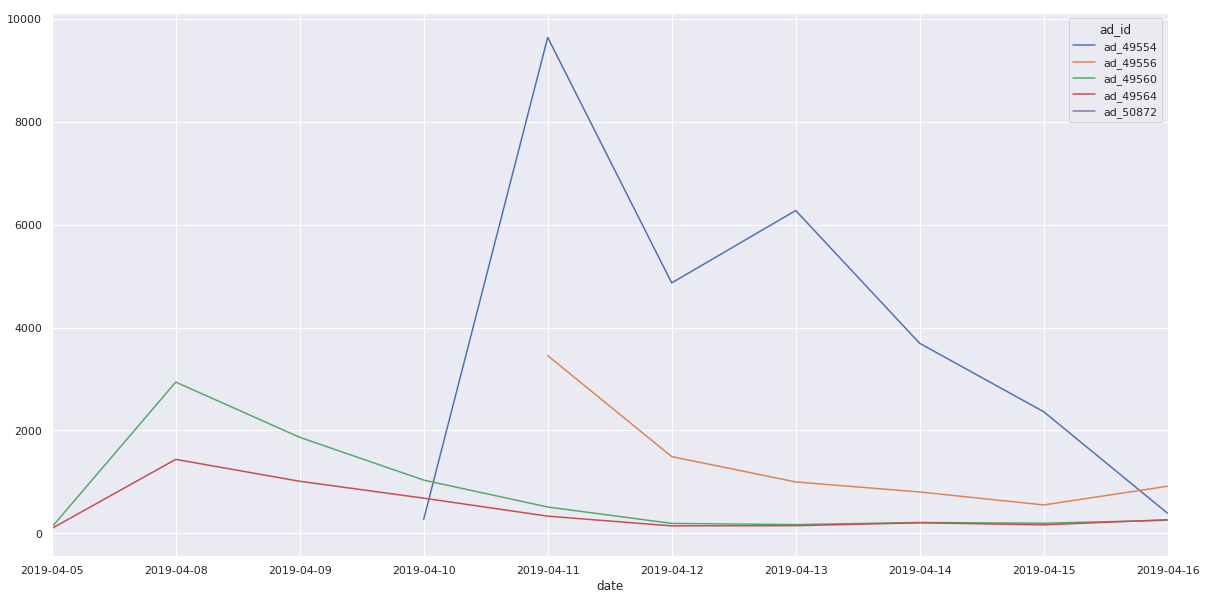

In [17]:
pivoted = pd.pivot_table(ag2_data[(ag2_data.client_union_id == 'client_47270') & (ag2_data.campaign_union_id == 'campaign_49554')], values='count', columns='ad_id', index='date', aggfunc='sum')
pivoted.plot()

В итоге наш "виноник"

agency_union_id = 'agency_2'

client_union_id = 'client_47270'

campaign_union_id = 'campaign_49554'

ad_id = 'ad_49554', другие тоже подозрительные


Выведем его более детально в разрезе, часов минут

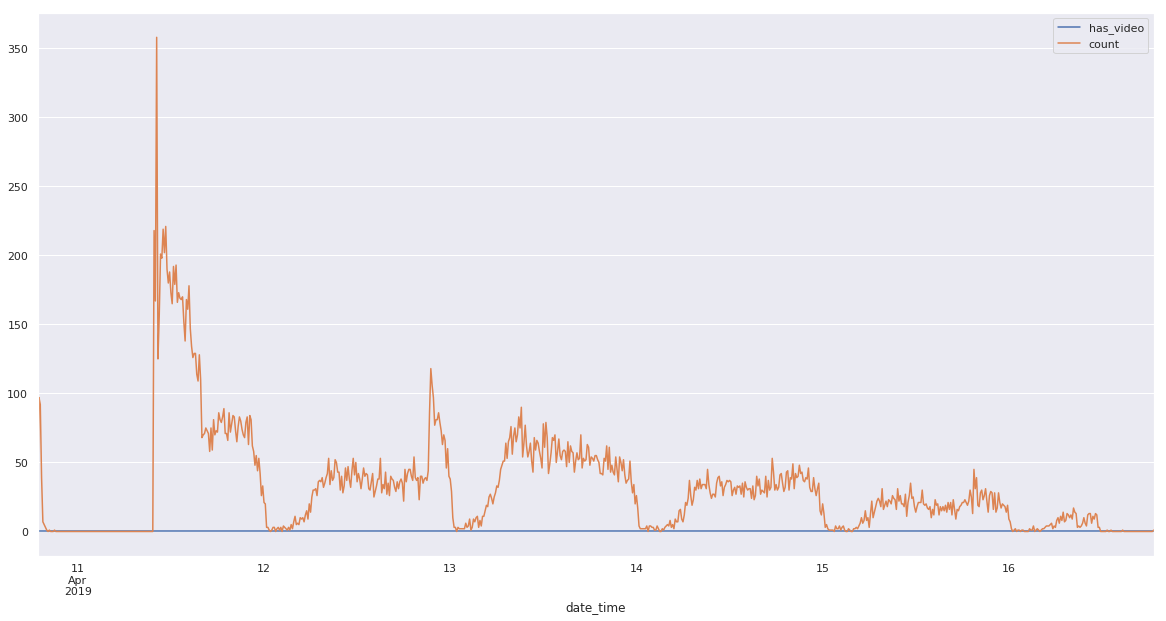

In [18]:
ad_data = ag2_data[(ag2_data.ad_id == 'ad_49554')].reset_index()

ad_data['date_time'] = pd.to_datetime(ad_data['time'], unit='s')
ad_data.index = ad_data['date_time']
del ad_data['date_time']
del ad_data['index']
del ad_data['time']
del ad_data['date']

#ad_data['date_hour'] = ad_data['date_time'].dt.strftime('%Y-%m-%d %H')
#ad_data['date_min'] = ad_data['date_time'].dt.strftime('%Y-%m-%d %H:%M')

ad_data.head()

ad_data.resample('10T').sum().plot()

Видно что график событий данного объявления  имеет скачки с повторением каждый час, а также в самом начале был большой всплеск

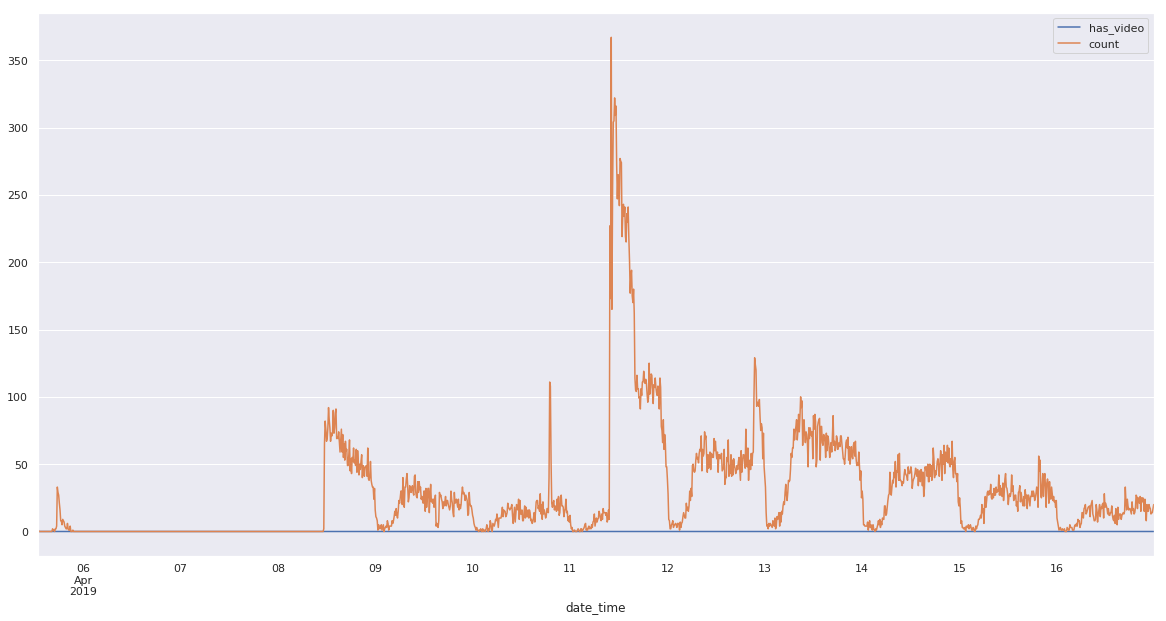

In [19]:
ad_data = ag2_data[(ag2_data.campaign_union_id == 'campaign_49554')].reset_index()

ad_data['date_time'] = pd.to_datetime(ad_data['time'], unit='s')
ad_data.index = ad_data['date_time']
del ad_data['date_time']
del ad_data['index']
del ad_data['time']
del ad_data['date']

#ad_data['date_hour'] = ad_data['date_time'].dt.strftime('%Y-%m-%d %H')
#ad_data['date_min'] = ad_data['date_time'].dt.strftime('%Y-%m-%d %H:%M')

ad_data.head()
ad_data.resample('10T').sum().plot()

В разрезе всей компании видим примерно такую же ситуацию


# **3 Предложения**
З*. Предложите способ, который помог бы автоматически детектировать аномальные изменения метрик на графиках рекламной статистики. 

Иными словами, предложите алгоритм, который каждое утро анализирует данные за прошедшие сутки, и, если они сильно выбиваются из общего тренда, отправляет аналитику уведомление: на этом графике есть проблема за вчерашний день. 

Подумайте, как сделать детектор, который проверяет на аномалии каждый час, каждые пять минут в графике? 

Предложите вариант кода, который решает эту задачу. 

Реализовывать логику нотификации не нужно, только поиск аномального дня, часа, пятиминутки в данных рекламной статистики. 



Т.к. нет детальной информации по параметрам самих объявлений, то первыми приходят несколько вариантов и способов анализа подобных аномалий:
- анализировать общую статистику (сумма показов всех объявлений за период) или статистику усредненого тем или иным способом объявления
- использовать простые статистические модели (нормальное распределение, правило 3х сигм или другие), либо методы машинного обучения
- либо нагуглить другие варианты)

В данном случае кажется оптимальным воспользоваться общей статистикой и оценкой с использованием правила 3х сигм.

In [0]:
#  Подготовим данные и уберем ненужные колонки

al_data = test_data.reset_index()


al_data['date_time'] = pd.to_datetime(al_data['time'], unit='s')
al_data.index = al_data['date_time']
del al_data['date_time']
del al_data['index']
del al_data['time']
del al_data['date']
del al_data['has_video']

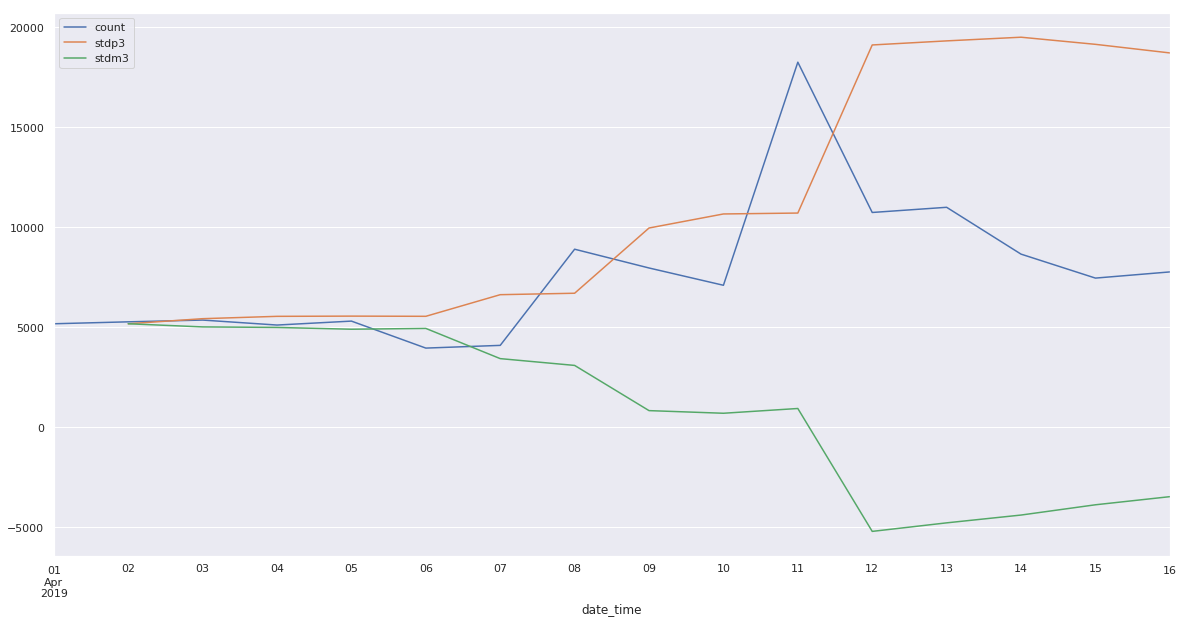

In [114]:
# Ресемплируем до дня

al_data_day = al_data.resample('1D').sum()

roll = 31
count_sigma = 3

mean = al_data_day['count'].rolling(roll, min_periods=1).mean() # среднее
al_data_day['stdp3'] = mean + count_sigma * al_data_day['count'].rolling(roll, min_periods=1).std().fillna(0) # среднее + 3 сигма
al_data_day['stdm3'] = mean - count_sigma * al_data_day['count'].rolling(roll, min_periods=1).std().fillna(0) # среднее - 3 сигма
# смещаем прогноз и строим график
al_data_day['stdp3'] = al_data_day['stdp3'].shift(+1) 
al_data_day['stdm3'] = al_data_day['stdm3'].shift(+1)


al_data_day.plot()

Видим что график count выходит за рамки прогнозируемых данных несколько раз, кроме 11 апреля

В данном случае скорей всего данная ситуация из-за небольшого количества тестовых данных (отрезка времени), при окне в месяц или более - бедет другая картина

Также данный критерий можно улучшить использованием формул для других распределений 

Но в целом если смотреть на график до 11 числа - резкое падение 6 и скачек 8 кажутся такими же аномальными как 11 числа 

У данного алгоритма есть и другой минус - после аномалий данные этих аномалий влияют на последующий прогноз. 
Чтобы это исключить - можно игнорировать такик данные для последующей аналитики


Теперь преобразуем данный алгоритм в код проверки на аномальность предыдущего дня

In [0]:
#  Подготовим данные, уберем ненужные колонки, 
# 
# а также оставим в тестовом наборе данные до 12 числа, чтобы воспроизвести утро 12 числа

check_data = test_data.reset_index()

check_data['date_time'] = pd.to_datetime(check_data['time'], unit='s')
check_data.index = check_data['date_time']
del check_data['date_time']
del check_data['index']
del check_data['time']
del check_data['date']
del check_data['has_video']

check_day_data = check_data.resample('1D').sum()


check_day_data = check_day_data.loc[(check_day_data.index < pd.to_datetime('2019-04-12'))]

In [208]:
# отделяем данные за 11 число от остальных и считаем показатели до 11 числа
# если бы у нас не было нижней границы, то надо было бы отфильтровать и их

check_info = check_day_data.loc[(check_day_data.index >= pd.to_datetime('2019-04-11'))].values[0][0]
check_day_bef11 = check_day_data.loc[(check_day_data.index < pd.to_datetime('2019-04-11'))]

top = check_day_bef11.mean()[0] + 3 * check_day_bef11.std()[0]
bottom = check_day_bef11.mean()[0] - 3 * check_day_bef11.std()[0]

if ( check_info > top or check_info < bottom):
  print('ANOMALY')
else:
  print('ALL OK')


ANOMALY


По аналогии можно анализировать и по часам и по 5 минут, отличие в ресемплировании и окне для расчета среднего 

In [228]:
# По часам за последние 2 дня
check_hour_data = check_data.resample('1H').sum()


check_hour_data = check_hour_data.loc[(check_hour_data.index < pd.to_datetime('2019-04-11 17:00:00'))]
check_info = check_hour_data.tail(1).values[0][0]
check_hour_data = check_hour_data.drop(check_hour_data.tail(1).index).tail(48)
#check_hour_data.tail(24)


top = check_hour_data.mean()[0] + 3 * check_hour_data.std()[0]
bottom = check_hour_data.mean()[0] - 3 * check_hour_data.std()[0]

if ( check_info > top or check_info < bottom):
  print('ANOMALY')
else:
  print('ALL OK')


ALL OK


In [239]:
# По 5 минут за последний день

check_5m_data = check_data.resample('5T').sum()


check_5m_data = check_5m_data.loc[(check_5m_data.index < pd.to_datetime('2019-04-12 17:00:00'))]
check_info = check_5m_data.tail(1).values[0][0]
check_5m_data = check_5m_data.drop(check_5m_data.tail(1).index).tail(288)


top = check_5m_data.mean()[0] + 3 * check_5m_data.std()[0]
bottom = check_5m_data.mean()[0] - 3 * check_5m_data.std()[0]

if ( check_info > top or check_info < bottom):
  print('ANOMALY')
else:
  print('ALL OK')


ALL OK
